### Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,B,G,R,Y
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [3]:
print(df.shape)

(245057, 4)


In [4]:
print(df['Y'].value_counts())

2    194198
1     50859
Name: Y, dtype: int64


### Changing target variable's i.e 1,2 to 0,1

In [5]:
df['Y'][df['Y']==1]=0
df['Y'][df['Y']==2]=1

In [6]:
df.Y

0         0
1         0
2         0
3         0
4         0
         ..
245052    1
245053    1
245054    1
245055    1
245056    1
Name: Y, Length: 245057, dtype: int64

### Checking for null values

In [7]:
df.isnull().sum()

B    0
G    0
R    0
Y    0
dtype: int64

### Exploratory Data Analysis

<Figure size 720x720 with 0 Axes>

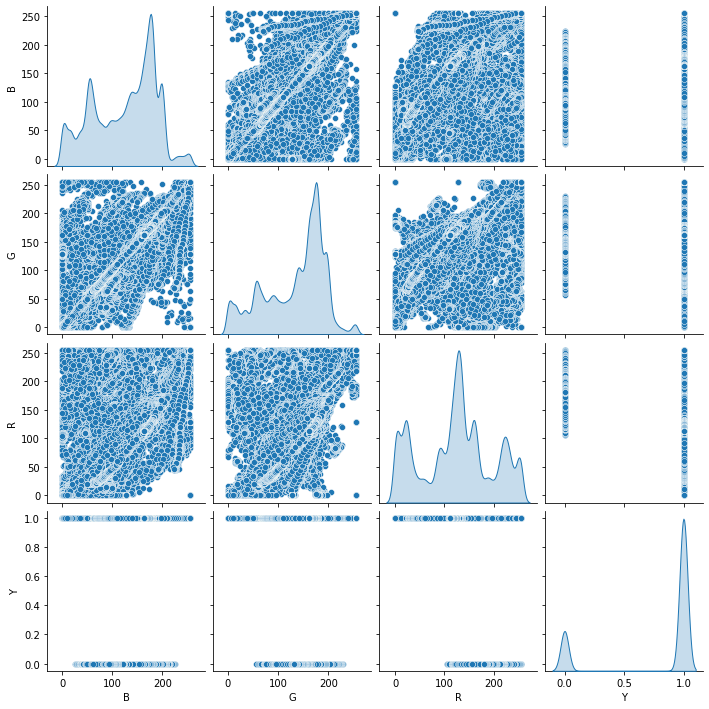

In [8]:
plt.figure(figsize=(10,10))
cols=['B', 'G', 'R', 'Y'] 
sns.pairplot(df[cols],diag_kind='kde')

### HeatMap

          B         G         R         Y
B  1.000000  0.855250  0.496376  0.092030
G  0.855250  1.000000  0.660098 -0.120327
R  0.496376  0.660098  1.000000 -0.569958
Y  0.092030 -0.120327 -0.569958  1.000000


<AxesSubplot:>

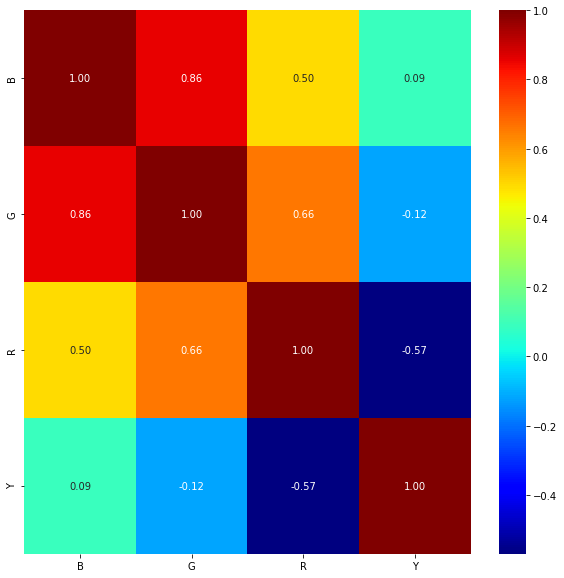

In [9]:
corr=df.corr()
print(corr)

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='jet',annot_kws={'size':10},cbar=True)

### Preparing the data

In [10]:
X = df.drop('Y', axis = "columns")
X.head()

,B,G,R
0,74,85,123
1,73,84,122
2,72,83,121
3,70,81,119
4,70,81,119


In [11]:
y = df['Y']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Y, dtype: int64

### Train,Test and Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(196045, 3)
(49012, 3)
(196045,)
(49012,)


### Decison Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print("Decison Tree Accuracy: ", dtree.score(X_test, y_test))

Decison Tree Accuracy:  0.9993062923365706


### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',C=10)
lr.fit(X_train, y_train)
print("Logistic Regression Accuracy : ", lr.score(X_test, y_test))

Logistic Regression Accuracy :  0.918142495715335


### Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Naive Bayes Accuracy: ", nb.score(X_test, y_test))

Naive Bayes Accuracy:  0.9233044968579124


### KNeighborsClassifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("KNeighborsClassifier Accuracy: ", knn.score(X_test, y_test))

KNeighborsClassifier Accuracy:  0.9995511303354281


### Support Vector Machine

In [18]:
from sklearn.svm import SVC
rbf_model=SVC(C=10,kernel='rbf')
rbf_model.fit(X_train, y_train)
print("Support Vector Accuracy: ", rbf_model.score(X_test, y_test))

Support Vector Accuracy:  0.9986941973394271


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_depth=3)
rfc.fit(X_train, y_train)
print("Random Forest Accuracy: ", rfc.score(X_test, y_test))

### Classification Report

In [19]:
## For the Prediciton
y_predicted = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10151
           1       1.00      1.00      1.00     38861

    accuracy                           1.00     49012
   macro avg       1.00      1.00      1.00     49012
weighted avg       1.00      1.00      1.00     49012



### Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
print(cm)

[[10134    17]
 [   17 38844]]


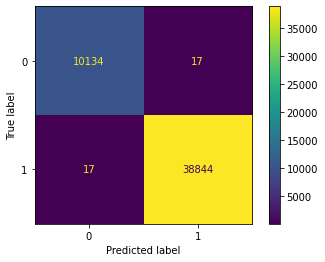

In [22]:
from sklearn.metrics import plot_confusion_matrix
cm=plot_confusion_matrix(dtree,X_test,y_test,values_format = '')
print(cm)